In [ ]:
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION
!pip install torch-xla

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6028  100  6028    0     0  22532      0 --:--:-- --:--:-- --:--:-- 22576
usage: pytorch-xla-env-setup.py [-h] [--version VERSION]
                                [--apt-packages APT_PACKAGES [APT_PACKAGES ...]] [--tpu TPU]
pytorch-xla-env-setup.py: error: argument --version: expected one argument
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-ap

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "0"

In [ ]:
import time
import torch
from tqdm import tqdm


In [ ]:
import torch
device = torch.device("cuda")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio --unzip
! kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess --unzip
! kaggle datasets download ejlok1/cremad --unzip

100% 428M/429M [00:14<00:00, 33.7MB/s]
100% 429M/429M [00:14<00:00, 30.6MB/s]
 98% 105M/107M [00:04<00:00, 16.8MB/s]
100% 107M/107M [00:04<00:00, 24.1MB/s]
100% 428M/428M [00:15<00:00, 26.6MB/s]
100% 428M/428M [00:15<00:00, 28.8MB/s]
100% 451M/451M [00:16<00:00, 33.8MB/s]
100% 451M/451M [00:16<00:00, 29.2MB/s]


In [ ]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio




import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
ravdess = "/content/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_05', 'Actor_16', 'Actor_01', 'Actor_09', 'Actor_10', 'Actor_06', 'Actor_23', 'Actor_13', 'Actor_18', 'Actor_15', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_03', 'Actor_20', 'Actor_12', 'Actor_21', 'Actor_02', 'Actor_11', 'Actor_07', 'Actor_19', 'Actor_08', 'Actor_17', 'Actor_04']


In [ ]:
Crema = "/content/AudioWAV/"
Tess = "/content/TESS Toronto emotional speech set data/"
Savee = "/content/ALL/"

In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)


In [ ]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-02-02-01-01-22.wav
03
/content/audio_speech_actors_01-24/Actor_03/03-01-07-01-01-01-03.wav
3
03-01-03-01-02-01-22.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1: 'neutral', 2: 'happy', 3: 'sad', 4: 'angry', 5: 'fear', 6: 'disgust'}, inplace=True)

# Usuwanie rekordów, które nie mają jednej z 6 oczekiwanych etykiet emocji
ravdess_df = ravdess_df[ravdess_df.Emotions.isin(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust'])]

# Wyświetlenie danych i liczby etykiet emocji
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
1  neutral  /content/audio_speech_actors_01-24/Actor_05/03...
2     fear  /content/audio_speech_actors_01-24/Actor_05/03...
3     fear  /content/audio_speech_actors_01-24/Actor_05/03...
4  disgust  /content/audio_speech_actors_01-24/Actor_05/03...
6  disgust  /content/audio_speech_actors_01-24/Actor_05/03...
______________________________________________
     Emotions                                               Path
1433  disgust  /content/audio_speech_actors_01-24/Actor_04/03...
1434     fear  /content/audio_speech_actors_01-24/Actor_04/03...
1436  disgust  /content/audio_speech_actors_01-24/Actor_04/03...
1437    happy  /content/audio_speech_actors_01-24/Actor_04/03...
1438      sad  /content/audio_speech_actors_01-24/Actor_04/03...
_______________________________________________
fear       192
disgust    192
sad        192
happy      192
angry      192
neutral     96
Name: Emotions, dtype: int64


In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        None

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

happy      1271
sad        1271
fear       1271
disgust    1271
angry      1271
neutral    1087
Name: Emotions, dtype: int64


In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0].split('_')[2]
        if part != 'ps':  # Ignorowanie plików oznaczonych jako 'surprise'
            file_emotion.append(part)
            file_path.append(Tess + dir + '/' + file)

# Tworzenie dataframe'ów dla emocji i ścieżek plików
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Wyświetlanie liczby etykiet emocji
print(Tess_df.Emotions.value_counts())

happy      400
angry      400
sad        400
disgust    400
neutral    400
fear       400
Name: Emotions, dtype: int64


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    part = file.split('_')[1]
    ele = part[:-6]
    if ele in ['a', 'd', 'f', 'h', 'n', 'sa']:
        file_path.append(Savee + file)
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')

# Tworzenie DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral    120
fear        60
disgust     60
happy       60
sad         60
angry       60
Name: Emotions, dtype: int64


In [ ]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
1,neutral,/content/audio_speech_actors_01-24/Actor_05/03...
2,fear,/content/audio_speech_actors_01-24/Actor_05/03...
3,fear,/content/audio_speech_actors_01-24/Actor_05/03...
4,disgust,/content/audio_speech_actors_01-24/Actor_05/03...
6,disgust,/content/audio_speech_actors_01-24/Actor_05/03...


In [ ]:
import os
import pandas as pd

RAV = "/content/audio_speech_actors_01-24/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender), RAV_df, pd.DataFrame(emotion)],axis=1)
RAV_df.columns = ['gender','emotion','labels']
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df.emotion.value_counts()
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
RAV_df.head()


,gender,emotion,labels,source,path
0,male,happy,3,RAVDESS,/content/audio_speech_actors_01-24/Actor_01/03...
1,male,angry,5,RAVDESS,/content/audio_speech_actors_01-24/Actor_01/03...
2,male,happy,3,RAVDESS,/content/audio_speech_actors_01-24/Actor_01/03...
3,male,fear,6,RAVDESS,/content/audio_speech_actors_01-24/Actor_01/03...
4,male,disgust,7,RAVDESS,/content/audio_speech_actors_01-24/Actor_01/03...


In [ ]:
emotion_to_label = {
    'neutral': 0,
    'happy': 1,
    'sad': 2,
    'angry': 3,
    'fear': 4,
    'disgust': 5

}

# Apply the mapping to the 'Emotions' column to create a new 'label' column
data_path['label'] = data_path['Emotions'].map(emotion_to_label)


In [ ]:
data_path = data_path[(data_path["Emotions"]=="neutral") | (data_path["Emotions"]=="happy") | (data_path["Emotions"]=="sad") | (data_path["Emotions"]=="angry") | (data_path["Emotions"]=="fear") | (data_path["Emotions"]=="disgust")]


In [ ]:
train_df = data_path .sample(frac=0.8)
test_df = data_path .drop(train_df.index)

In [ ]:
train_df

,Emotions,Path,label
6084,neutral,/content/AudioWAV/1049_WSI_NEU_XX.wav,0
2376,angry,/content/TESS Toronto emotional speech set dat...,3
1353,sad,/content/audio_speech_actors_01-24/Actor_17/03...,2
6588,disgust,/content/AudioWAV/1049_IEO_DIS_LO.wav,5
958,happy,/content/audio_speech_actors_01-24/Actor_12/03...,1
...,...,...,...
1125,disgust,/content/TESS Toronto emotional speech set dat...,5
3270,neutral,/content/AudioWAV/1082_WSI_NEU_XX.wav,0
517,happy,/content/TESS Toronto emotional speech set dat...,1
371,fear,/content/AudioWAV/1027_WSI_FEA_XX.wav,4


In [ ]:
train_df["Emotions"].value_counts()

angry      1543
fear       1541
disgust    1535
sad        1533
happy      1518
neutral    1384
Name: Emotions, dtype: int64

In [ ]:
import IPython.display as ipd
id = 0
print(train_df.iloc[id])
ipd.Audio(data=train_df.iloc[id]["Path"], autoplay=True, rate=16000)

Emotions                                  neutral
Path        /content/AudioWAV/1049_WSI_NEU_XX.wav
label                                           0
Name: 6084, dtype: object


In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


Nie odpalamy tego pliku jeśli nie chcemy robić mapowania a korzystamy z zapisanych modeli

In [ ]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["Path"], sr=16000, mono=True)
    example["speech"] = speech
    return example
train_data = Dataset.from_pandas(train_df).map(map_to_array)
torch.save(train_data, 'train_data.pt')

# Process and save test data
test_data = Dataset.from_pandas(test_df).map(map_to_array)
torch.save(test_data, 'test_data.pt')

# Feature extraction
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")

# Extract and save train features
train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
torch.save(train_encodings, 'train_encodings.pt')

# Extract and save test features
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
torch.save(test_encodings, 'test_encodings.pt')

Map:   0%|          | 0/9054 [00:00<?, ? examples/s]

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

In [ ]:
import torch
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa
# Feature extraction
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")

# Load processed data
train_data = torch.load('train_data.pt')
test_data = torch.load('test_data.pt')

# Load feature encodings
train_encodings = torch.load('train_encodings.pt')
test_encodings = torch.load('test_encodings.pt')

In [ ]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.pattern = {
            1: "neutral",
            2: "happy",
            3: "sad",
            4: "angry",
            5: "fear",
            6: "disgust",

        }

        self.labels = labels


    def __getitem__(self, idx):
      item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels'] = torch.tensor(self.labels[idx])
      return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, list(train_data["label"]))
test_dataset = EmotionDataset(test_encodings, list(test_data["label"]))

In [ ]:

from torch.optim import Adam
from transformers import HubertConfig, HubertForSequenceClassification

# Load the configuration from the pre-trained model
config = HubertConfig.from_pretrained("superb/hubert-large-superb-er", num_labels=6)

# Create a new model with the updated configuration
model = HubertForSequenceClassification(config)
model = model.to(device)


# Loading the optimizer
optim = Adam(model.parameters(), lr=1e-5)

config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

In [ ]:
# Prediction function
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [ ]:
import os
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

torch.autograd.set_detect_anomaly(True)

# Set the number of epochs
epoch = 25

# Start training
model.train()

train_loss = list()
train_accuracies = list()

# Further reduce the batch size
batch_size = 6  # Adjust this based on your GPU memory

# Optimize data loading
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Gradient Accumulation steps
accumulation_steps = 4  # Adjust this based on your needs
checkpoint_dir = '/content/drive/My Drive/modelcheckpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))

    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    optim.zero_grad()  # Initialize gradient to zero

    for batch_idx, batch in enumerate(pbar):
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss'] / accumulation_steps  # Normalize the loss

        loss.backward()

        # Perform optimization step after 'accumulation_steps' batches
        if (batch_idx + 1) % accumulation_steps == 0:
            optim.step()
            optim.zero_grad()

        # Clear the GPU cache more frequently
        torch.cuda.empty_cache()

        # make predictions
        predictions = predict(outputs)

        # count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # show progress along with metrics
        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })

    # Record the loss and accuracy for each epoch
    train_loss += epoch_loss
    train_accuracies.append(accuracy)

    # Save the model at the end of each epoch
    checkpoint_path = os.path.join(checkpoint_dir, f'model_epoch_{epoch_i+1}.pt')
    torch.save({
        'epoch': epoch_i,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optim.state_dict(),
        'loss': train_loss,
        'accuracy': train_accuracies
    }, checkpoint_path)

    print(f'Model saved to {checkpoint_path} after epoch {epoch_i+1}')

    pbar.close()

# Make sure to do one last optimization step if necessary
if len(train_loader) % accumulation_steps != 0:
    optim.step()
    optim.zero_grad()

Epoch 1/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_1.pt after epoch 1
Epoch 2/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_2.pt after epoch 2
Epoch 3/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_3.pt after epoch 3
Epoch 4/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_4.pt after epoch 4
Epoch 5/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_5.pt after epoch 5
Epoch 6/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_6.pt after epoch 6
Epoch 7/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_7.pt after epoch 7
Epoch 8/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_8.pt after epoch 8
Epoch 9/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

Model saved to /content/drive/My Drive/modelcheckpoints/model_epoch_9.pt after epoch 9
Epoch 10/25


  0%|          | 0/1509 [00:00<?, ?it/s]<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-32-e8b7f74dbcd9

In [ ]:
# Testing
from torch.utils.data import DataLoader

# Get test data by DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Start testing
model_path = '/content/drive/MyDrive/TRANSFORMERS_MODEL.pth'
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')
config = HubertConfig.from_pretrained("superb/hubert-large-superb-er", num_labels=7)
model = HubertForSequenceClassification(config)
model.to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()
model.eval()

with torch.no_grad():

    correct = 0
    count = 0
    record = {"labels":list(), "predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        # make predictions
        predictions = predict(outputs)

        # count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # show progress along with metrics
        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        # record the results
        record["labels"] += labels.cpu().numpy().tolist()
        record["predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The final accuracy on the test dataset: %s%%" % round(accuracy*100,4))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
  0%|          | 0/1112 [00:00<?, ?it/s]<ipython-input-29-2fd35be9a60c>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 1112/1112 [14:07<00:00,  1.31it/s, loss=0.000, accuracy=0.884]


The final accuracy on the test dataset: 88.3993%


In [ ]:
# Convert test record to a pandas DataFrame object
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Ground Truth","Model Prediction"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Ground Truth"] = df_record.apply(lambda x: get_emotion(x["Ground Truth"]), axis=1)
df_record["Model Prediction"] = df_record.apply(lambda x: get_emotion(x["Model Prediction"]), axis=1)

# Concat test texts and test records
df = pd.concat([test_df.reset_index(), df_record["Model Prediction"]], axis=1)
df["Emotions"] = df.apply(lambda x: x["Emotions"][:3], axis=1)

# Show test result
pd.set_option('display.max_rows', None)    # Display all rows
df

# Show incorrect predictions
# df[df["Emotions"]!=df["Model Prediction"]]

,index,Emotions,Path,label,Model Prediction
0,311,ang,/content/audio_speech_actors_01-24/Actor_06/03...,3,LABEL_2
1,590,hap,/content/audio_speech_actors_01-24/Actor_15/03...,1,LABEL_0
2,748,fea,/content/audio_speech_actors_01-24/Actor_14/03...,4,LABEL_3
3,881,ang,/content/audio_speech_actors_01-24/Actor_20/03...,3,LABEL_2
4,1065,dis,/content/audio_speech_actors_01-24/Actor_02/03...,5,LABEL_4
5,1231,fea,/content/audio_speech_actors_01-24/Actor_19/03...,4,LABEL_3
6,1436,dis,/content/audio_speech_actors_01-24/Actor_04/03...,5,LABEL_4
7,311,fea,/content/AudioWAV/1051_ITH_FEA_XX.wav,4,LABEL_4
8,458,hap,/content/AudioWAV/1058_ITH_HAP_XX.wav,1,LABEL_1
9,490,dis,/content/AudioWAV/1046_MTI_DIS_XX.wav,5,LABEL_5


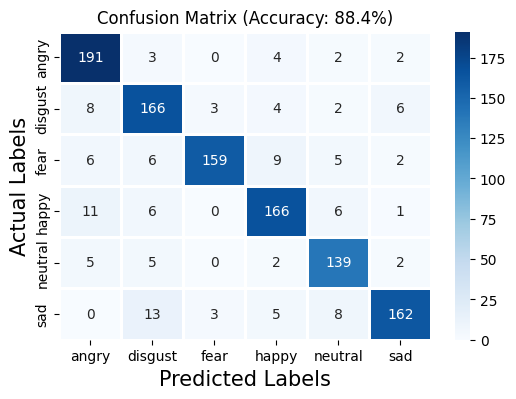

In [ ]:
# # Label mapping
label_mapping = {
    "LABEL_0": "neutral",
    "LABEL_1": "happy",
    "LABEL_2": "sad",
    "LABEL_3": "angry",
    "LABEL_4": "fear",
    "LABEL_5": "disgust"
}

# Apply the mapping
df_record["Ground Truth"] = df_record["Ground Truth"].map(label_mapping)
df_record["Model Prediction"] = df_record["Model Prediction"].map(label_mapping)

# Create the confusion matrix
crosstab = pd.crosstab(df_record["Ground Truth"], df_record["Model Prediction"])

# Plotting
plt.figure(figsize = (6, 4))
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='.0f', linewidths=1)
accuracy = df_record["Ground Truth"].eq(df_record["Model Prediction"]).sum() / len(df_record["Ground Truth"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('Actual Labels', size=15)
plt.show()

In [ ]:
model.eval()

HubertForSequenceClassification(
  (hubert): HubertModel(
    (feature_extractor): HubertFeatureEncoder(
      (conv_layers): ModuleList(
        (0): HubertLayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x HubertLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x HubertLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): HubertFeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (pro

In [ ]:
for name, param in model.named_parameters():
    print(name, param.size())

layer_weights torch.Size([25])
hubert.masked_spec_embed torch.Size([1024])
hubert.feature_extractor.conv_layers.0.conv.weight torch.Size([512, 1, 10])
hubert.feature_extractor.conv_layers.0.conv.bias torch.Size([512])
hubert.feature_extractor.conv_layers.0.layer_norm.weight torch.Size([512])
hubert.feature_extractor.conv_layers.0.layer_norm.bias torch.Size([512])
hubert.feature_extractor.conv_layers.1.conv.weight torch.Size([512, 512, 3])
hubert.feature_extractor.conv_layers.1.conv.bias torch.Size([512])
hubert.feature_extractor.conv_layers.1.layer_norm.weight torch.Size([512])
hubert.feature_extractor.conv_layers.1.layer_norm.bias torch.Size([512])
hubert.feature_extractor.conv_layers.2.conv.weight torch.Size([512, 512, 3])
hubert.feature_extractor.conv_layers.2.conv.bias torch.Size([512])
hubert.feature_extractor.conv_layers.2.layer_norm.weight torch.Size([512])
hubert.feature_extractor.conv_layers.2.layer_norm.bias torch.Size([512])
hubert.feature_extractor.conv_layers.3.conv.weight